In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from autoemulate.compare import AutoEmulate
from sklearn.metrics import r2_score

from autoemulate.experimental_design import LatinHypercube
from autoemulate.simulations.flow_functions import FlowProblem

show_progress = False if os.getenv("JUPYTER_BOOK_BUILD", "false").lower() == "true" else True

In [2]:
fp = FlowProblem(ncycles=10, ncomp=10, amp=900.)
fp.generate_pulse_function()

fp.solve()

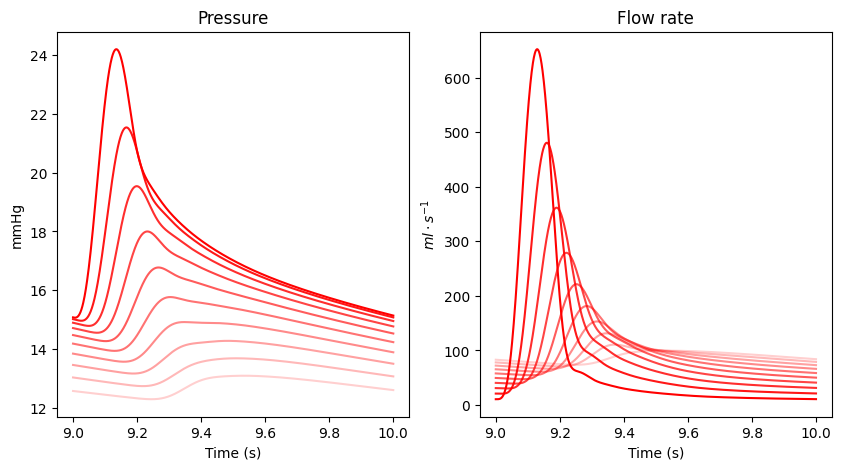

In [3]:
fig, ax = fp.plot_res()
plt.show()

In [4]:
## specify valid parameter ranges
# Dictionary with parameters and their scaled ranges for the blood flow model
parameters_range = {
    'T': tuple(np.array([0.5, 1.5]) * 1.0),  # Cardiac cycle period (s)
    'td': tuple(np.array([0.8, 1.2]) * 0.2),  # Pulse duration (s)
    'amp': tuple(np.array([0.8, 1.2]) * 900.0),  # Amplitude (e.g., pressure or flow rate)
    'dt': tuple(np.array([0.5, 1.5]) * 0.001),  # Time step (s)
    'C': tuple(np.array([0.8, 1.2]) * 38.0),  # Compliance (unit varies based on context)
    'R': tuple(np.array([0.8, 1.2]) * 0.06),  # Resistance (unit varies based on context)
    'L': tuple(np.array([0.8, 1.2]) * 0.0017),  # Inductance (unit varies based on context)
    'R_o': tuple(np.array([0.8, 1.2]) * 0.025),  # Outflow resistance (unit varies based on context)
    'p_o': tuple(np.array([0.9, 1.1]) * 10.0)  # Initial pressure (unit varies based on context)
}

# Output the dictionary for verification

parameters_range

{'T': (0.5, 1.5),
 'td': (0.16000000000000003, 0.24),
 'amp': (720.0, 1080.0),
 'dt': (0.0005, 0.0015),
 'C': (30.400000000000002, 45.6),
 'R': (0.048, 0.072),
 'L': (0.00136, 0.0020399999999999997),
 'R_o': (0.020000000000000004, 0.03),
 'p_o': (9.0, 11.0)}

In [5]:
## sample from parameter range

N_samples = 60
lhd = LatinHypercube(parameters_range.values())
sample_array = lhd.sample(N_samples)
sample_df    = pd.DataFrame(sample_array, columns=parameters_range.keys())  
print("Number of parameters", sample_df.shape[1], "Number of samples from each parameter", sample_df.shape[0])
sample_df.head()

Number of parameters 9 Number of samples from each parameter 60


,T,td,amp,dt,C,R,L,R_o,p_o
0,1.478992,0.230051,798.643465,0.001335,32.099679,0.049910,0.001959,0.029940,9.473189
1,0.894792,0.236860,920.498404,0.000596,32.563401,0.049307,0.001909,0.020448,9.701942
2,1.227445,0.177758,1028.037952,0.001019,32.180075,0.062124,0.001856,0.027176,10.460015
3,1.434406,0.187119,761.032322,0.001379,44.560910,0.056800,0.001823,0.028537,9.534418
4,1.103395,0.222193,1007.179982,0.001072,44.783148,0.066248,0.001846,0.022372,10.911437


In [6]:
# enforce parameter relations (eg td <= T)
sample_df['td'] = sample_df.apply(lambda row: row['td']* row['T'], axis=1)

In [7]:
sample_df

,T,td,amp,dt,C,R,L,R_o,p_o
0,1.478992,0.340243,798.643465,0.001335,32.099679,0.049910,0.001959,0.029940,9.473189
1,0.894792,0.211940,920.498404,0.000596,32.563401,0.049307,0.001909,0.020448,9.701942
2,1.227445,0.218189,1028.037952,0.001019,32.180075,0.062124,0.001856,0.027176,10.460015
3,1.434406,0.268404,761.032322,0.001379,44.560910,0.056800,0.001823,0.028537,9.534418
4,1.103395,0.245167,1007.179982,0.001072,44.783148,0.066248,0.001846,0.022372,10.911437
5,0.683625,0.111971,933.631618,0.000952,39.588838,0.052290,0.001488,0.026188,10.099017
6,0.541064,0.111546,902.967086,0.001318,34.417262,0.061885,0.001665,0.024205,10.953140
7,1.039843,0.171943,728.406325,0.000889,38.184173,0.071809,0.001499,0.029359,10.370633
8,0.514021,0.104682,847.166253,0.000516,37.645327,0.058897,0.002037,0.025455,10.854238
9,1.260091,0.216315,784.939768,0.001414,41.779649,0.066994,0.001644,0.029077,9.649747


In [8]:
# Fixed parameters: Number of compartments and cycles
ncomp = 10
ncycles = 10

# Function to run a simulation for a given set of parameters
def simulate(param_dict):
    fp = FlowProblem(ncycles=ncycles, ncomp=ncomp, **param_dict)
    fp.generate_pulse_function()
    fp.solve()
    return fp, fp.res.t, fp.res.y

Y = []
# Iterate over each sample of parameters
for index, row in tqdm(sample_df.iterrows(), total=len(sample_df), disable=show_progress):
    param_dict = row.to_dict() 
    fp, t, y = simulate(param_dict) 
    # extract peak pressure
    peak_pressure = y[:ncomp, :].max()
    Y.append(peak_pressure)

In [9]:
em = AutoEmulate()
parameter_names = list(parameters_range.keys())
em.setup(sample_df[parameter_names], Y, models = ['gp', 'svm','lgbm'])

,Values
Simulation input shape (X),"(60, 9)"
Simulation output shape (y),"(60,)"
Proportion of data for testing (test_set_size),0.2
Scale input data (scale),True
Scaler (scaler),StandardScaler
Scale output data (scale_output),True
Scaler output (scaler_output),StandardScaler
Do hyperparameter search (param_search),False
Reduce input dimensionality (reduce_dim),False
Reduce output dimensionality (reduce_dim_output),False


In [10]:
best_model = em.compare()

Cross-validating:   0%|          | 0/3 [00:00<?, ?it/s]

In [11]:
em.summarise_cv()

,preprocessing,model,short,fold,rmse,r2
0,None,GaussianProcess,gp,1,7.673958,0.992264
1,None,GaussianProcess,gp,3,8.754664,0.991655
2,None,GaussianProcess,gp,4,16.166865,0.974599
3,None,GaussianProcess,gp,0,10.419761,0.969367
4,None,GaussianProcess,gp,2,13.694915,0.948978
5,None,SupportVectorMachines,svm,1,34.700062,0.841818
6,None,SupportVectorMachines,svm,3,41.328709,0.814030
7,None,SupportVectorMachines,svm,4,45.910786,0.795154
8,None,SupportVectorMachines,svm,0,27.864789,0.780931
9,None,SupportVectorMachines,svm,2,48.026288,0.372526


In [12]:
gp = em.get_model("GaussianProcess")
em.evaluate(gp)

,model,short,preprocessing,rmse,r2
0,GaussianProcess,gp,None,8.2643,0.9924


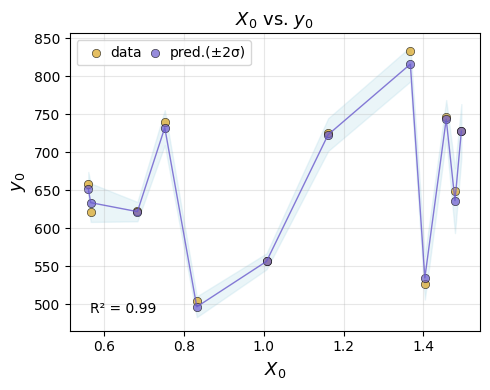

In [13]:
em.plot_eval(gp)

In [14]:
best_emulator = em.refit(gp)

In [15]:
# Extract parameter names and bounds from the dictionary
parameter_names = list(parameters_range.keys())
parameter_bounds = list(parameters_range.values())

# Define the problem dictionary for Sobol sensitivity analysis
problem = {
    'num_vars': len(parameter_names),
    'names': parameter_names,
    'bounds': parameter_bounds
}

In [ ]:
em.sensitivity_analysis(problem=problem)